# Cardiotocography Data Set Analysis - Part 1

## [Summary](https://archive.ics.uci.edu/ml/datasets/Cardiotocography)

This dataset consists of measurements of fetal heart rate (FHR) and
uterine contraction (UC) features on cardiotocograms classified
by expert obstetricians.

Classification was both with respect to a morphologic pattern (A, B, C, ...)
and to a fetal state (N=normal, S=suspect, P=pathologic).

In [ ]:
# download the dataset to the working directory if necessary
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls

The [CTG.xls](CTG.xls) Excel file contains the 2126 CTGs.

## Attribute information

The following attributes are corresponding to columns A to AN in the Raw Data
sheet of the Excel file.

Column | Attribute | Description
-------|-----------|------------------
A      | FileName  | of CTG examination
B      | Date      | of the examination
C      | SegFile   | of the examination
D      | b	       | start instant
E      | e         | end instant
F      | LBE       | baseline value (medical expert)
G      | LB	       | baseline value (SisPorto)
H      | AC	       | accelerations (SisPorto)
I      | FM	       | foetal movement (SisPorto)
J      | UC	       | uterine contractions (SisPorto)
K      | ASTV	   | percentage of time with abnormal short term variability  (SisPorto)
L      | mSTV	   | mean value of short term variability  (SisPorto)
M      | ALTV	   | percentage of time with abnormal long term variability  (SisPorto)
N      | mLTV	   | mean value of long term variability  (SisPorto)
O      | DL	       | light decelerations
P      | DS	       | severe decelerations
Q      | DP	       | prolonged decelerations
R      | DR	       | repetitive decelerations
S      | Width	   | histogram width
T      | Min       | low freq. of the histogram
U      | Max       | high freq. of the histogram
V      | Nmax	   | number of histogram peaks
W      | Nzeros	   | number of histogram zeros
X      | Mode	   | histogram mode
Y      | Mean	   | histogram mean
Z      | Median	   | histogram median
AA     | Variance  | histogram variance
AB     | Tendency  | histogram tendency: -1=left asymmetric; 0=symmetric; 1=right assymetric
AC     | A	       | calm sleep
AD     | B	       | REM sleep
AE     | C	       | calm vigilance
AF     | D	       | active vigilance
AG     | SH	       | shift pattern (A or Susp with shifts)
AH     | AD	       | accelerative/decelerative pattern (stress situation)
AI     | DE	       | decelerative pattern (vagal stimulation)
AJ     | LD	       | largely decelerative pattern
AK     | FS	       | flat-sinusoidal pattern (pathological state)
AL     | SUSP	   | suspect pattern
AM     | CLASS	   | Class code (1 to 10) for classes A to SUSP
AN     | NSP       | Normal=1; Suspect=2; Pathologic=3

## Business understanding

### Business objectives

According to [this article](https://geekymedics.com/how-to-read-a-ctg/),
the purpose of cardiotocography is to monitor fetal well-being
and allow early detection of fetal distress. An abnormal CTG
may indicate the need for further investigations and
potential intervention.

Interpretation of CTG is not an easy task.
A second opinion would often prove to be helpful to experts
even if it comes from a machine.

### Data mining goals

Our primary goal would be to classify new CTGs based on the
historical data. This means that we will focus on building a
machine learning model that is capable of CTG classification.

But first, let's dive deeper into the data. We will examine and
research each feature (column) of the data to get a better understanding
of what we're dealing with in the following section.

## Data understanding, exploration and cleaning

In the following section we load dataset into a data frame
with `pandas` and we start to analyze the columns one-by-one.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('CTG.xls', 'Raw Data')
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems like the first and last 3 rows are empty, let's drop those.

In [108]:
indices = [0]
indices.extend(df.tail(3).index)
df.drop(index=indices, axis=0, inplace=True)
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,S8001045.dsp,1998-06-06,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,S8001045.dsp,1998-06-06,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,S8001045.dsp,1998-06-06,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


Now we have the aforementioned 2126 rows of data.

Let's get rid of some columns that obviously look
irrelevant to our data mining goals:
* FileName
* Date
* SegFile

In [109]:
df.drop(columns=['FileName', 'Date', 'SegFile'], inplace=True)
df

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


---
Let's try to understand the first two columns, `b` and `e`.
They probably stand for `beginning` and `end` as their description is
start instant and end instant respectively. This means they must represent
a time interval, possibly in seconds.

An [article](https://www.babycenter.in/x1045384/what-is-cardiotocography-ctg-and-why-do-i-need-it)
about CTG tells us that these examinations can last between 20 and 60 minutes.

These intervals may represent a particular segment of the CTG that was
examined and the rest of the features were recorded during this interval.

Let's examine these intervals to validate our assumptions.

Time intervals
Min:  1.95
Max:  59.983333333333334
Mean:  13.740624020068987
Median:  13.316666666666666
Mode:  19.983333333333334
Variance:  25.84943257250721


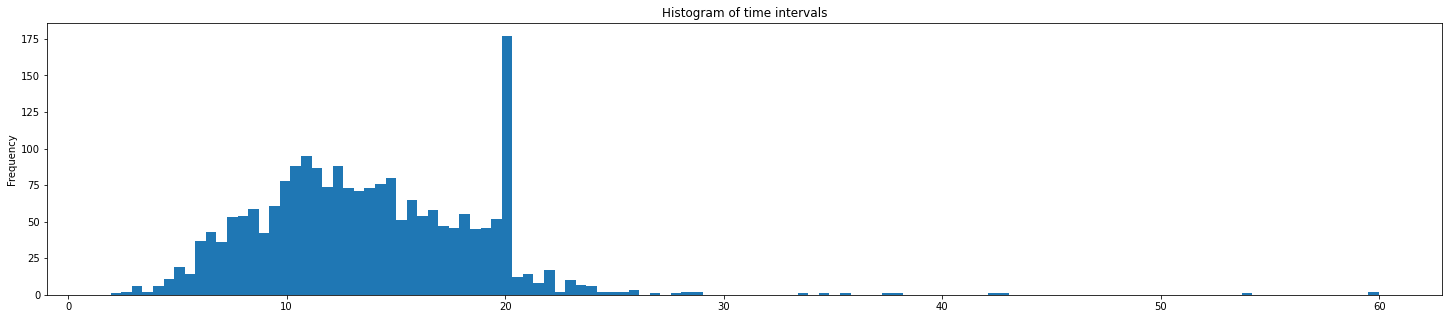

In [110]:
time_intervals = (df['e'] - df['b']) / 60.0

def print_min_max_etc(name, series):
    print(name)
    print('Min: ', series.min())
    print('Max: ', series.max())
    print('Mean: ', series.mean())
    print('Median: ', series.median())
    print('Mode: ', series.mode()[0])
    print('Variance: ', series.var())

print_min_max_etc('Time intervals', time_intervals)

figure_counter = 1
def save_figure(fig):
    global figure_counter
    fig.savefig('figure_' + str(figure_counter) + '.eps', format='eps', bbox_inches='tight')
    figure_counter += 1

plot = time_intervals.plot.hist(title='Histogram of time intervals',
                                figsize=(25, 5),
                                bins=120)

save_figure(plot.get_figure())

The histogram shows us that the intervals are between ~2 and ~60 minutes.
There are only few of intervals that are longer than 20 minutes, most of them is
between 10 and 20 minutes, while the most frequent interval is around 20 minutes.

Our assumptions seem to be correct. We could create a new feature out of
the `b` and `e` columns which contains only the interval, but at this point the
relevance of the start instant is uncertain. Both the start and end instant features
could be relevant in the interpretation, so let's keep them as is for now.

---
Now let's look at the baseline columns.

**[Baseline fetal heart rate (FHR)](https://en.wikipedia.org/wiki/Cardiotocography):**
The baseline FHR is determined by approximating the mean
FHR rounded to increments of 5 beats per minute (bpm) during
a 10-minute window, excluding accelerations and decelerations
and periods of marked FHR variability (greater than 25 bpm).
There must be at least 2 minutes of identifiable baseline segments
(not necessarily contiguous) in any 10-minute window, or the baseline
for that period is indeterminate. In such cases, it may be necessary
to refer to the previous 10-minute window for determination of the baseline.
Abnormal baseline is termed bradycardia when the baseline FHR is less
than 110 bpm; it is termed tachycardia when the baseline FHR is greater
than 160 bpm.

This means the `LBE` and `LB` columns both represent a bpm (beat per minute)
value. This looks like one of the most important features of the data, as the
boundaries are determinative and clearly defined.

The difference between the two columns is that the `LBE` column contains baseline
values which were determined by a medical expert while the `LB` column values
were calculated by the [SisPorto](http://www.omniview.eu/ing/overview) system.

At first glance, it looks like these columns contain the same values
for each row. Let's check it and if our assumption is true, we might as well
drop one of them to reduce the number of features.

In [111]:
if df['LBE'].equals(df['LB']):
    print('LBE and LB are equal, dropping LBE')
    df.drop(columns=['LBE'], inplace=True)
else:
    print('LBE and LB are not equal!')
df

LBE and LB are equal, dropping LBE


,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2059.0,2867.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


Looks like our assumption was true, now we only have to deal with the `LB` column.

We can also check if the baseline values are within the normal 110-160 range.

LB
Min:  106.0
Max:  160.0
Mean:  133.3038570084666
Median:  133.0
Mode:  133.0
Variance:  96.84221570472027


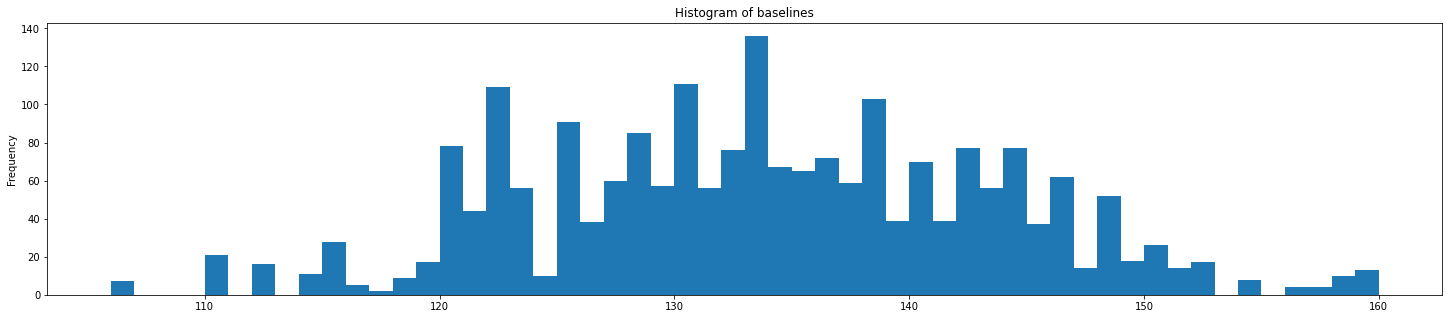

In [112]:
print_min_max_etc('LB', df['LB'])

lb_min = df['LB'].min()
lb_max = df['LB'].max()
plot = df['LB'].plot.hist(title='Histogram of baselines',
                          figsize=(25, 5),
                          bins=int(lb_max - lb_min))

save_figure(plot.get_figure())

The baseline histogram suggests normal distribution, which is
a good thing with such an important feature.

There are some edge cases though of low and high baselines.
Let's look at these rows more closely.

In [113]:
edge_cases = df.query('LB <= 110 or LB >= 160')
edge_cases

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1660,1432.0,2281.0,106.0,9.0,0.0,8.0,62.0,1.4,0.0,12.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1661,2113.0,2906.0,106.0,0.0,0.0,8.0,63.0,0.6,0.0,14.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1662,2126.0,3092.0,106.0,0.0,0.0,10.0,63.0,0.6,0.0,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1663,2324.0,3233.0,106.0,1.0,0.0,10.0,63.0,0.6,0.0,11.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1664,2227.0,3101.0,106.0,0.0,0.0,9.0,63.0,0.6,0.0,12.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1665,2456.0,3195.0,106.0,0.0,0.0,7.0,64.0,0.6,0.0,10.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1666,2804.0,3597.0,106.0,5.0,0.0,5.0,64.0,0.7,0.0,12.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1667,0.0,1529.0,110.0,3.0,0.0,11.0,62.0,0.9,0.0,11.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1668,42.0,1122.0,110.0,3.0,0.0,7.0,61.0,0.9,0.0,10.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1669,215.0,1506.0,110.0,3.0,0.0,9.0,63.0,0.8,0.0,10.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


Looks like we found 29 edge cases based on the baseline boundaries.
This number is small and out of these, only 1 has 160 baseline, all the others are 110 or below.
Let's see the distribution of these cases among the morphological classes
and NSP values.

But before that, in order to get a better understanding of the charts, let's
create a mapping of the classes and NSP values to their descriptions and
the function to plot the distributions.

In [114]:
classes_description_dict = {
    1  : 'calm sleep',
    2  : 'REM sleep',
    3  : 'calm vigilance',
    4  : 'active vigilance',
    5  : 'shift pattern',
    6  : 'accelerative/decelerative pattern',
    7  : 'decelerative pattern',
    8  : 'largely decelerative pattern',
    9  : 'flat-sinusoidal pattern',
    10 : 'suspect pattern'
}

nsp_description_dict = {
    1 : 'normal',
    2 : 'suspect',
    3 : 'pathologic'
}

def plot_distributions(class_counts, nsp_counts):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    class_labels = list(map(lambda clz: classes_description_dict[clz], class_counts.index))
    axes[0].title.set_text('Morphological classes')
    axes[0].pie(class_counts,
            labels=class_labels,
            autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(nsp_counts)/100))
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    nsp_labels = list(map(lambda nsp: nsp_description_dict[nsp], nsp_counts.index))
    axes[1].title.set_text('NSP values')
    axes[1].pie(nsp_counts,
            labels=nsp_labels,
            autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(nsp_counts)/100))
    axes[1].axis('equal')  #

    save_figure(fig)
    plt.show()

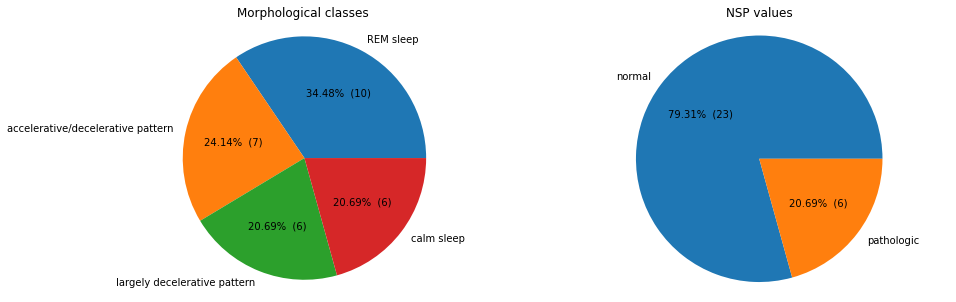

In [115]:
edge_cases_class_counts = edge_cases['CLASS'].value_counts()
edge_cases_nsp_counts = edge_cases['NSP'].value_counts()

plot_distributions(edge_cases_class_counts, edge_cases_nsp_counts)

By looking at these pie charts, we can see that the edge cases based on solely the baseline value
are not certainly pathologic. Also keep in mind that most of the edge cases had low baseline values,
which could mean that the fetus is sleeping. This is reflected in the chart on the left.

In order to get a better grasp of the distribution of cases among morphological classes and NSP values,
let's see these charts for all the cases.

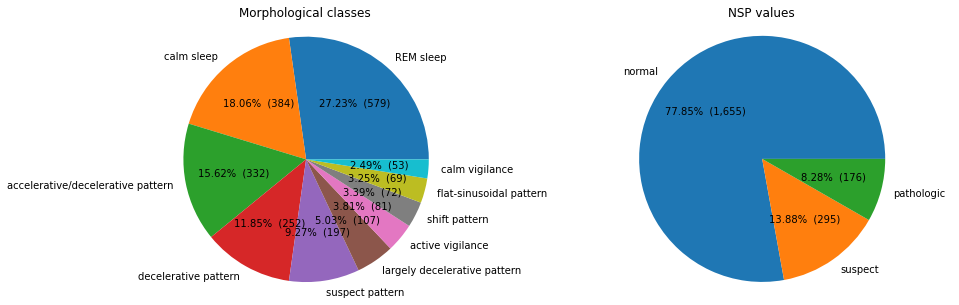

In [116]:
plot_distributions(df['CLASS'].value_counts(), df['NSP'].value_counts())

The similarity between the charts showing all the cases and the charts showing only the edge cases
further proves our point.

---
Let's move on to the next features.

The `AC`, `FM`, `UC` columns contain the number of accelerations, fetal movements and uterine
contractions respectively during the examined interval (between `b` and `e`).
All of these numbers should be non-negative integers to make sense. These are certainly
important features, so let's check if this constraint holds.

AC
Min:  0.0
Max:  26.0
Mean:  2.722483537158984
Median:  1.0
Mode:  0.0
Variance:  12.679654252670025
FM
Min:  0.0
Max:  564.0
Mean:  7.241298212605833
Median:  0.0
Mode:  0.0
Variance:  1378.2885713020864
UC
Min:  0.0
Max:  23.0
Mean:  3.6599247412982128
Median:  3.0
Mode:  0.0
Variance:  8.105941453156992
All of the AC, FM, UC values are non-negative integers


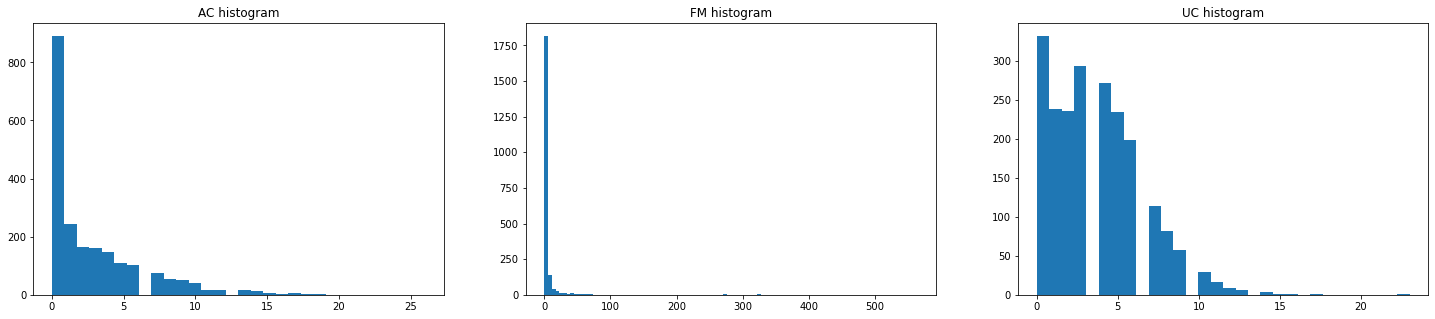

In [117]:
print_min_max_etc('AC', df['AC'])
print_min_max_etc('FM', df['FM'])
print_min_max_etc('UC', df['UC'])

if df[['AC', 'FM', 'UC']].apply(lambda x: x[0].is_integer() and x[0] >= 0, axis=1).all():
    print("All of the AC, FM, UC values are non-negative integers")
else:
    print("There are AC, FM, UC values that are not non-negative integers")

fig, axes = plt.subplots(1, 3, figsize=(25, 5))
axes[0].title.set_text('AC histogram')
axes[0].hist(df['AC'], bins=30)
axes[1].title.set_text('FM histogram')
axes[1].hist(df['FM'], bins=100)
axes[2].title.set_text('UC histogram')
axes[2].hist(df['UC'], bins=30)

save_figure(fig)
plt.show()

The histograms of these features are skewed to the left, meaning most
of the values are close to zero. In the case of fetal movements, we can see that
there are a couple of exceptionally high values, while the number of accelerations
and uterine contractions stayed in roughly in the range of 0-25.

---
Moving on to the `ASTV`, `MSTV`, `ALTV` and `MLTV` columns.

These features should give us a notion about the variability of the baseline.

[Baseline variability](https://geekymedics.com/how-to-read-a-ctg/#Variability)
refers to the variation of fetal heart rate from one beat to the next.
Variability occurs as a result of the interaction between the nervous system,
chemoreceptors, baroreceptors and cardiac responsiveness.
It is, therefore, a good indicator of how healthy a fetus is at that particular moment in time,
as a healthy fetus will constantly be adapting its heart rate in response to changes
in its environment.
* Reassuring –  5 – 25bpm
* Non-reassuring:
    * less than 5bpm for between 30-50 minutes
    * more than 25bpm for 15-25 minutes
* Abnormal:
    * less than 5bpm for more than 50 minutes
    * more than 25bpm for more than 25 minutes
    * sinusoidal

`ASTV` and `ALTV` represent percentages, so they must be between 0 and 100.

ASTV
Min:  12.0
Max:  87.0
Mean:  46.99012229539041
Median:  49.0
Mode:  60.0
Variance:  295.5928435615074
ALTV
Min:  0.0
Max:  91.0
Mean:  9.846660395108184
Median:  0.0
Mode:  0.0
Variance:  338.44518178296715
All ASTV and ALTV values are between 0 and 100


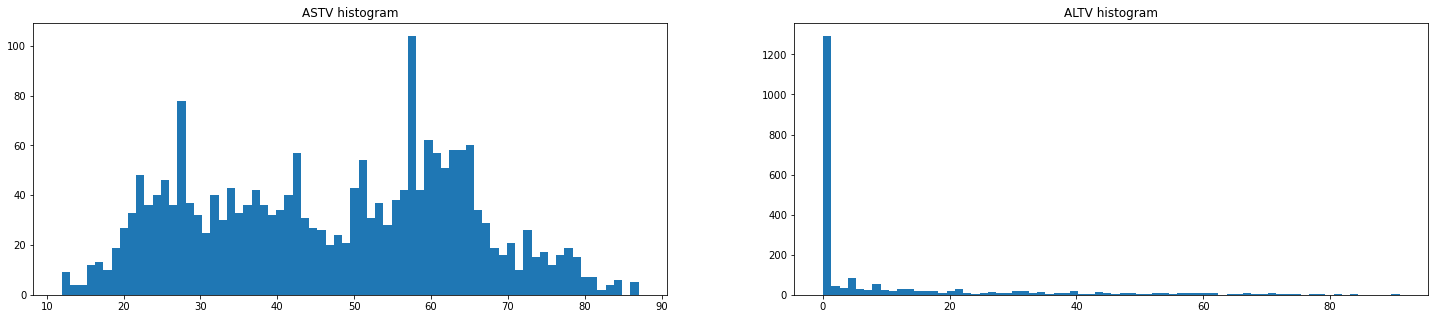

In [118]:
print_min_max_etc('ASTV', df['ASTV'])
print_min_max_etc('ALTV', df['ALTV'])

if df.query('ASTV < 0 or ASTV > 100 or ALTV < 0 or ALTV > 100').empty:
    print('All ASTV and ALTV values are between 0 and 100')
else:
    print('All ASTV and ALTV values are NOT between 0 and 100')

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
axes[0].title.set_text('ASTV histogram')
axes[0].hist(df['ASTV'], bins=70)
axes[1].title.set_text('ALTV histogram')
axes[1].hist(df['ALTV'], bins=70)
save_figure(fig)
plt.show()

The `ASTV` histogram seems kinda random with a couple of peaks,
it does not tell us much information other than that all of the
samples had times of short term variability.
The `ALTV` histogram is heavily skewed to the left, meaning that
episodes of long term variability were relatively few.

---
`MSTV` and `MLTV` represent mean values of variability, they must be non-negative numbers.

MSTV
Min:  0.2
Max:  7.0
Mean:  1.3327845719661335
Median:  1.2
Mode:  0.8
Variance:  0.7801152542748051
MLTV
Min:  0.0
Max:  50.7
Mean:  8.187629350893696
Median:  7.4
Mode:  0.0
Variance:  31.677159836201653


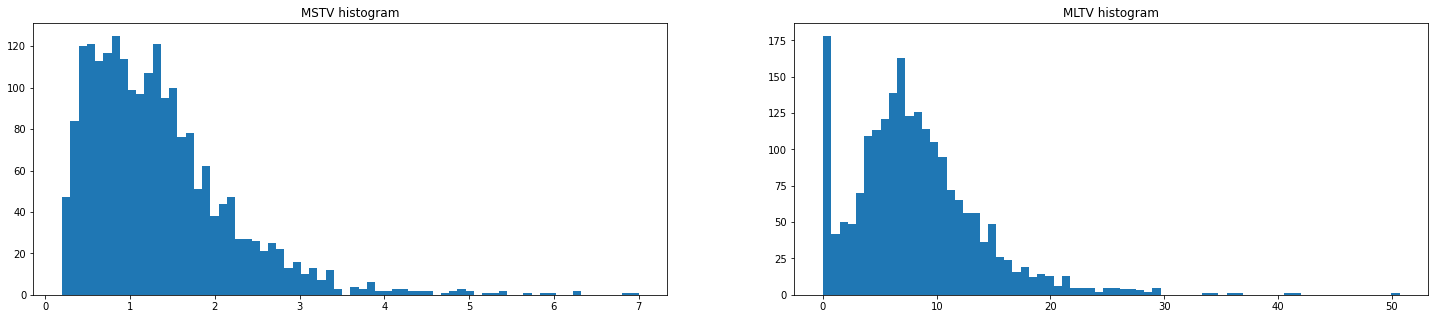

In [119]:
print_min_max_etc('MSTV', df['MSTV'])
print_min_max_etc('MLTV', df['MLTV'])

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
axes[0].title.set_text('MSTV histogram')
axes[0].hist(df['MSTV'], bins=70)
axes[1].title.set_text('MLTV histogram')
axes[1].hist(df['MLTV'], bins=70)
save_figure(fig)
plt.show()

Both histograms are skewed to the left, but the `MLTV` has an early peak at zero,
which makes sense since quite a few cases did not even have episodes of
long term variability.

---
Now let's look at the number of decelerations within the columns
`DL`, `DS`, `DP`, `DR`. They stand for light, severe, prolonged and
repetitive decelerations respectively.

But first, let's do some research on decelerations:

**[Decelerations](https://geekymedics.com/how-to-read-a-ctg/#Decelerations)**
* Decelerations are an abrupt decrease in the baseline fetal heart rate of greater
  than 15 bpm for greater than 15 seconds.
* The fetal heart rate is controlled by the autonomic and somatic nervous system.
  In response to hypoxic stress, the fetus reduces its heart rate to preserve
  myocardial oxygenation and perfusion. Unlike an adult, a fetus cannot increase
  its respiration depth and rate. This reduction in heart rate to reduce myocardial
  demand is referred to as a deceleration.
* There are a number of different types of decelerations,
  each with varying significance.

Deceleration types:
* *Early decelerations* start when the uterine contraction begins and
  recover when uterine contraction stops. This is due to increased fetal
  intracranial pressure causing increased vagal tone.
    * physiological, not pathological
* *Variable decelerations* are observed as a rapid fall in baseline
  fetal heart rate with a variable recovery phase. They are variable in their
  duration and may not have any relationship to uterine contractions.
    * their presence indicates the fetus is not yet hypoxic and is adapting to
      the reduced blood flow
    * usually caused by umbilical cord compression
    * non-reassuring if lasts for a long time
* *Late decelerations* begin at the peak of the uterine contraction
  and recover after the contraction ends This type of deceleration indicates
  there is insufficient blood flow to the uterus and placenta.
    * non-reassuring if lasts for a long time
* *Prolonged deceleration* is defined as a deceleration that lasts more than 3 minutes.
  If it lasts between 2-3 minutes it is classed as non-reassuring.
  If it lasts longer than 3 minutes it is immediately classed as abnormal.

Let's examine the columns!

DL
Min:  0.0
Max:  16.0
Mean:  1.570084666039511
Median:  0.0
Mode:  0.0
Variance:  6.246144651651817
DS
Min:  0.0
Max:  1.0
Mean:  0.003292568203198495
Median:  0.0
Mode:  0.0
Variance:  0.0032832715400365237
DP
Min:  0.0
Max:  4.0
Mean:  0.12605832549388524
Median:  0.0
Mode:  0.0
Variance:  0.21563123236124174
DR
Min:  0.0
Max:  0.0
Mean:  0.0
Median:  0.0
Mode:  0.0
Variance:  0.0


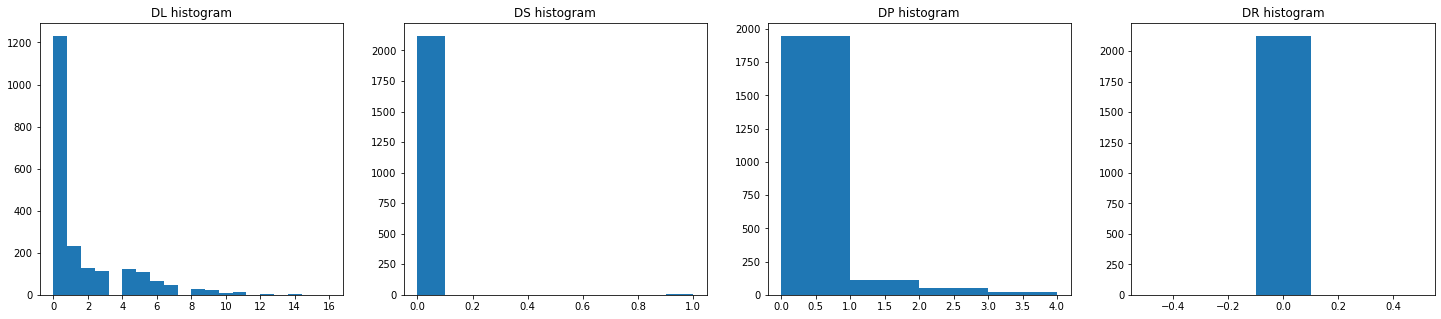

In [120]:
print_min_max_etc('DL', df['DL'])
print_min_max_etc('DS', df['DS'])
print_min_max_etc('DP', df['DP'])
print_min_max_etc('DR', df['DR'])

fig, axes = plt.subplots(1, 4, figsize=(25, 5))
axes[0].title.set_text('DL histogram')
axes[0].hist(df['DL'], bins=20)
axes[1].title.set_text('DS histogram')
axes[1].hist(df['DS'], bins=10)
axes[2].title.set_text('DP histogram')
axes[2].hist(df['DP'], bins=4)
axes[3].title.set_text('DR histogram')
axes[3].hist(df['DR'], bins=5)
save_figure(fig)
plt.show()

From these histograms we can tell right away that there are
zero cases of repetitive decelerations. We can drop the `DR` column.

In [121]:
df.drop(columns=['DR'], inplace=True)
df

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2059.0,2867.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


There are very few cases of severe decelerations also. Let's check these more closely.

In [122]:
severe_deceleration_cases = df.query('DS == 1')
severe_deceleration_cases

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1489,1532.0,2655.0,132.0,2.0,0.0,9.0,31.0,1.4,0.0,11.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
1490,1728.0,2655.0,132.0,0.0,0.0,6.0,32.0,1.3,0.0,13.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
1792,1839.0,2894.0,121.0,0.0,1.0,4.0,66.0,2.1,0.0,6.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
1793,1922.0,2894.0,121.0,0.0,1.0,3.0,67.0,2.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
1794,1922.0,2771.0,121.0,0.0,1.0,4.0,66.0,2.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
1795,2018.0,2892.0,121.0,0.0,1.0,3.0,68.0,2.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
1796,2153.0,2892.0,121.0,0.0,0.0,3.0,70.0,1.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0


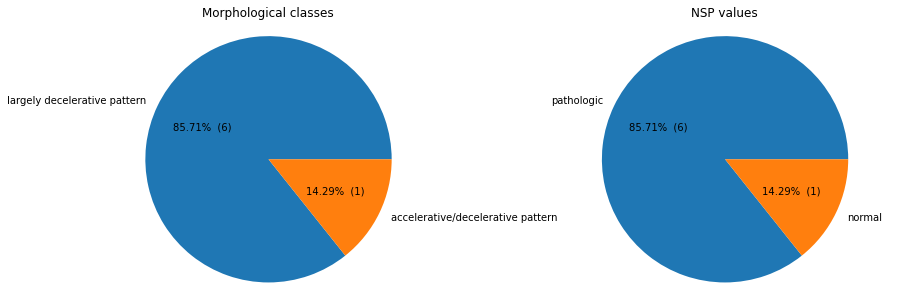

In [123]:
plot_distributions(severe_deceleration_cases['CLASS'].value_counts(),
                   severe_deceleration_cases['NSP'].value_counts())

Out of the 7 cases with severe deceleration, 6 of them are classified as
largely decelerative pattern and pathologic and only one is considered
just accelerative/decelerative pattern and normal.

This corresponds to what we learnt about decelerations in the research.

Unfortunately so few cases of severe decelerations means that there is close
to no variance in this feature. We might as well drop it to reduce the number
of features.

In [124]:
df.drop(columns=['DS'], inplace=True)
df

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2059.0,2867.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


The `DL` and `DP` histograms are heavily left skewed, but they
have some variance at least.

---
Let's move on to the attributes of the CTG histogram.

First, let's visualize these one by one next to each other.

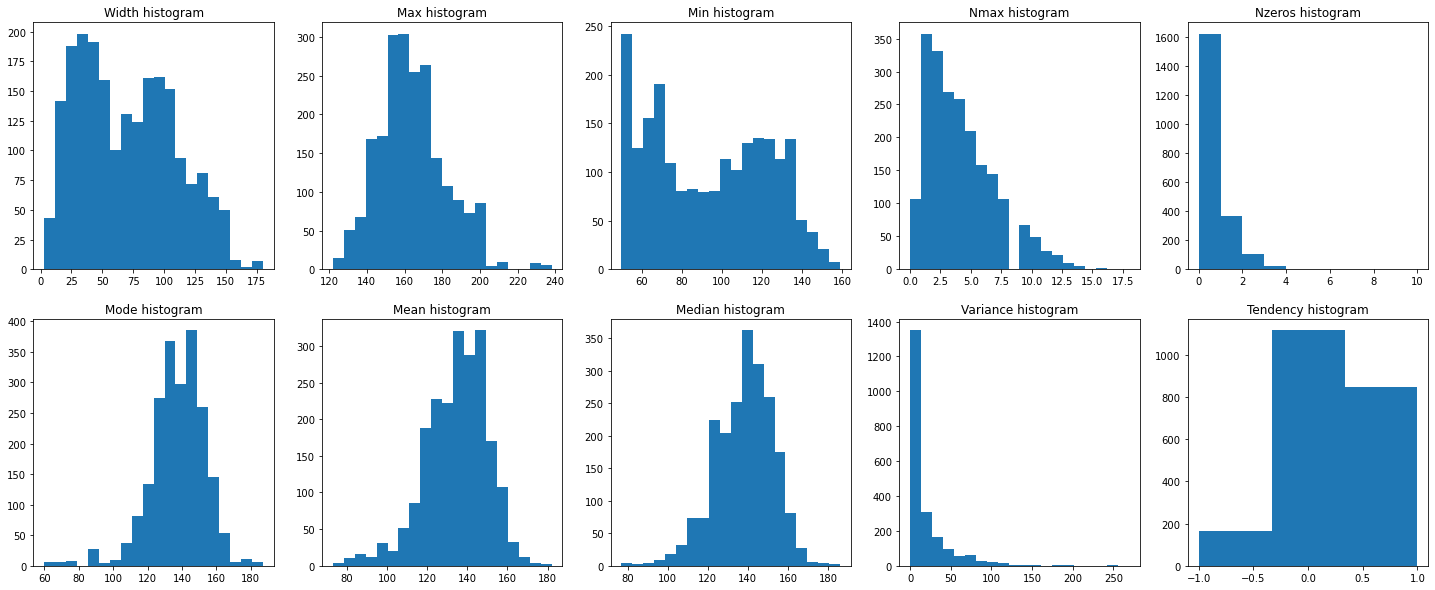

In [125]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes[0,0].title.set_text('Width histogram')
axes[0,0].hist(df['Width'], bins=20)
axes[0,1].title.set_text('Max histogram')
axes[0,1].hist(df['Max'], bins=20)
axes[0,2].title.set_text('Min histogram')
axes[0,2].hist(df['Min'], bins=20)
axes[0,3].title.set_text('Nmax histogram')
axes[0,3].hist(df['Nmax'], bins=20)
axes[0,4].title.set_text('Nzeros histogram')
axes[0,4].hist(df['Nzeros'], bins=10)
axes[1,0].title.set_text('Mode histogram')
axes[1,0].hist(df['Mode'], bins=20)
axes[1,1].title.set_text('Mean histogram')
axes[1,1].hist(df['Mean'], bins=20)
axes[1,2].title.set_text('Median histogram')
axes[1,2].hist(df['Median'], bins=20)
axes[1,3].title.set_text('Variance histogram')
axes[1,3].hist(df['Variance'], bins=20)
axes[1,4].title.set_text('Tendency histogram')
axes[1,4].hist(df['Tendency'], bins=3)
save_figure(fig)
plt.show()

What we can say at first glance from these histograms is that the
`Mode`, `Mean` and `Median` distribution densities are almost identical.
We might be able to reduce the number of features by dropping 2 of these.

In [126]:
df.drop(columns=['Mode', 'Median'], inplace=True)
df

,b,e,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2059.0,2867.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,1576.0,2867.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,1576.0,2596.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


The other features related to CTG histograms have interesting properties,
let's keep them as is for now.

---
Now we have examined all features we can work with and dropped some to reduce
the complexity of the problem.

Let's revisit the issue of the time intervals, columns `b` and `e`.
After examining all the other features, it seems that the time interval
is only relevant in the features which represent number of events during
the CTG examination. We could safely create a new feature which contain the
interval from the `b` and `e` columns. Let's drop `b` and `e` afterwards.

In [127]:
df.insert(0, 'time_intervals', time_intervals)
df.drop(columns=['b', 'e'], inplace=True)
df

,time_intervals,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,1.950000,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,10.450000,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,10.033333,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,13.016667,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,10.233333,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,13.466667,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,21.516667,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,17.000000,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,24.550000,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


We are left with 19 features to deal with and we can either use them
to build a 10-class (morphological classes) or a 3-class (NSP) classifier.

Let's store the dataframe and continue in the next [part](CTG_data_analysis_p2.ipynb).

In [128]:
%store df
%store classes_description_dict
%store nsp_description_dict
%store figure_counter

Stored 'df' (DataFrame)
Stored 'classes_description_dict' (dict)
Stored 'nsp_description_dict' (dict)
Stored 'figure_counter' (int)
